In [3]:
%pip install exif
%pip install PILLOW
%pip install numpy
%pip install opencv-python
%pip install matplotlib
%pip install PyExifTool
%pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 22.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 16.2 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py

In [5]:
from PIL import Image, ImageStat
from exif import Image as ExifImage
import numpy as np

In [6]:
def analyze_image(image_path):
    try:
        # Extract EXIF data
        exif_data = extract_exif(image_path)
        print('EXIF Data:', exif_data)

        # Check for typical screen resolution
        image = Image.open(image_path)
        dimensions = image.size
        print('Dimensions:', dimensions)

        # Analyze image visually for common screen elements
        visual_analysis = analyze_visual_elements(image, dimensions)
        print('Visual Analysis:', visual_analysis)

        return {'exif_data': exif_data, 'dimensions': dimensions, 'visual_analysis': visual_analysis}
    except Exception as e:
        print(f'Error analyzing image: {e}')

def extract_exif(image_path):
    try:
        with open(image_path, 'rb') as image_file:
            image = ExifImage(image_file)
            if image.has_exif:
                return image.list_all()
            else:
                return 'No EXIF data found'
    except Exception as e:
        print(f'Error extracting EXIF data: {e}')
        return 'Error extracting EXIF data'

def analyze_visual_elements(image, dimensions):
    analysis_results = []

    # Example: Check for common screen resolutions (1080p, 1440p, etc.)
    common_resolutions = [
        (1920, 1080),
        (2560, 1440),
        (3840, 2160),
        (1381, 835)
    ]

    if dimensions in common_resolutions:
        analysis_results.append('Common screen resolution detected')

    # Convert image to numpy array for pixel analysis
    image_data = np.array(image)

    # Check for specific pixel patterns (e.g., RGB subpixel patterns in screens)
    sub_pixel_pattern_detected = detect_sub_pixel_pattern(image_data)
    if sub_pixel_pattern_detected:
        analysis_results.append('Subpixel pattern detected')

    # Check for glare/reflection patterns
    glare_pattern_detected = detect_glare_pattern(image_data)
    if glare_pattern_detected:
        analysis_results.append('Glare/reflection pattern detected')

    return analysis_results if analysis_results else ['No specific visual patterns detected']

def detect_sub_pixel_pattern(image_data):
    # Implement your pixel pattern detection logic here
    # For example, you can check for repeating RGB subpixel patterns in a specific region of the image
    height, width, _ = image_data.shape
    for y in range(height):
        for x in range(width):
            r, g, b = image_data[y, x]
            
            # Simple heuristic: Check if RGB values form a specific pattern
            if r > g and r > b and g > b:
                return True
    return False

def detect_glare_pattern(image_data):
    # Implement your glare detection logic here
    # For example, you can check for sudden changes in brightness that might indicate glare
    height, width, _ = image_data.shape
    threshold = 200  # Arbitrary threshold for glare detection
    for y in range(height):
        for x in range(width):
            r, g, b = image_data[y, x]
            
            brightness = (r + g + b) / 3
            if brightness > threshold:
                return True
    return False


In [3]:
result = analyze_image('./images/print.png')
print('Analysis Result:', result)

EXIF Data: No EXIF data found
Dimensions: (1381, 835)
Error analyzing image: too many values to unpack (expected 3)
Analysis Result: None


# Análise de frequência com FFT:

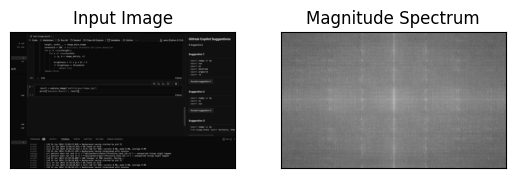

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageStat
from exif import Image as ExifImage
import numpy as np

image = cv2.imread('./images/print.png', 0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Detecção de bordas com OpenCV:


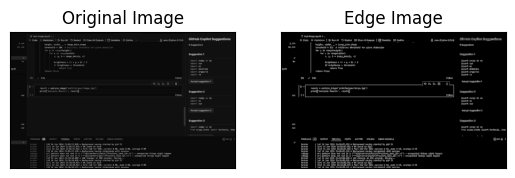

In [13]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./images/print.png', 0)
edges = cv2.Canny(image, 100, 200)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from scipy.fft import fft2, fftshift
from PIL import Image, ImageStat
from exif import Image as ExifImage
import numpy as np

def extract_exif(image_path):
    try:
        with open(image_path, 'rb') as image_file:
            image = ExifImage(image_file)
            if image.has_exif:
                return image.list_all()
            else:
                return 'No EXIF data found'
    except Exception as e:
        print(f'Error extracting EXIF data: {e}')
        return 'Error extracting EXIF data'
    
def detect_edges(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

def analyze_frequency(image):
    f = fft2(image)
    fshift = fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return magnitude_spectrum

def analyze_image(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Extract EXIF data
    exif_data = extract_exif(image_path)
    
    # Edge detection
    edges = detect_edges(image)
    
    # Frequency analysis
    frequency_spectrum = analyze_frequency(image)
    
    # Check for the presence of the exact "Model" property
    model_property_found = False
    for line in exif_data.splitlines():
        print(line)
        if line.startswith("Model"):
            print("Propriedade 'Model' encontrada:", line)
            model_property_found = True
            break
    
    if not model_property_found:
        print("Propriedade 'Model' ausente nos dados EXIF.")
        return 'Foto manipulada'
    
    # Analyze edges
    if np.mean(edges) > 50:  # This is a simple threshold, adjust as needed
        return 'Foto de foto'
    
    print(np.mean(frequency_spectrum))
    # Analyze frequency spectrum
    if np.mean(frequency_spectrum) < 10:  # This is a simple threshold, adjust as needed
        return 'Print de uma tela'
    
    # If none of the above conditions are met
    return 'Foto autêntica'


In [49]:
result = analyze_image('./images/print.png')
print(result)

No EXIF data found
Propriedade 'Model' ausente nos dados EXIF.
Foto manipulada


In [51]:
result = analyze_image('./images/drone.JPG')
print(result)

AttributeError: 'list' object has no attribute 'splitlines'

In [52]:
result = analyze_image('./images/celular.png')
print(result)

Error extracting EXIF data: 

+--------+------------+-------+-------+------------------------+
| Offset | Access     | Value | Bytes | Format                 |
+--------+------------+-------+-------+------------------------+
|        |            |       |       | TiffHeader (Structure) |
| 0      | byte_order | 9592  | 25 78 | tiff_byte_order        |
+--------+------------+-------+-------+------------------------+

ValueError occurred during unpack operation:

9592 is not a valid TiffByteOrder
Error extracting EXIF data
Propriedade 'Model' ausente nos dados EXIF.
Foto manipulada
